
**The Sparks Foundation
Data Science And Business Analytics - Task1**


**Hello, I am Dounia Sadiky.**

Here is my solution for **Task1** in Sparks Foundation-Data Science And Business Analytics

In [6]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
# Reading data from remote link
path = "Students.csv"
data = pd.read_csv(path)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print("Our dataset consist of {} samples".format(data.shape[0]))
print('-'*50)
print("There are {} features: {}".format(data.shape[1],data.columns.values))
print('-'*50)
print(data.describe())
print('-'*50)
print("Missed values:")
data.isnull().sum()

Our dataset consist of 25 samples
--------------------------------------------------
There are 2 features: ['Hours' 'Scores']
--------------------------------------------------
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
--------------------------------------------------
Missed values:


Hours     0
Scores    0
dtype: int64

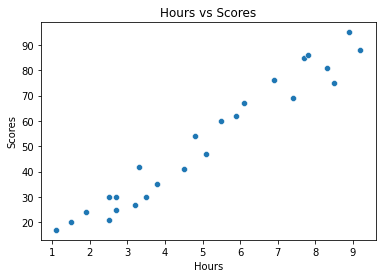

In [7]:
#Plotting the distribution of scores
plt.title('Hours vs Scores')  
sns.scatterplot(data = data , x = "Hours" , y = "Scores")

It's clear that hours of study and student score have strong positive linear correlation.

In [9]:
#Preparing the data
from sklearn.model_selection import train_test_split  


X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train , X_test , y_train , y_test = train_test_split(X , y,test_size=0.2, random_state=0) 

X_train = X_train.reshape(-1,1) 
X_test = X_test.reshape(-1,1) 

print("Train Data:")
print("X : {}".format(X_train.shape))
print("y : {}".format(y_train.shape))
print("-" * 100)
print("Test Data:")
print("X : {}".format(X_test.shape))
print("y : {}".format(y_test.shape))
print("-" * 100)
print("Our data is ready for training !! ")

Train Data:
X : (20, 1)
y : (20,)
----------------------------------------------------------------------------------------------------
Test Data:
X : (5, 1)
y : (5,)
----------------------------------------------------------------------------------------------------
Our data is ready for training !! 


In [10]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


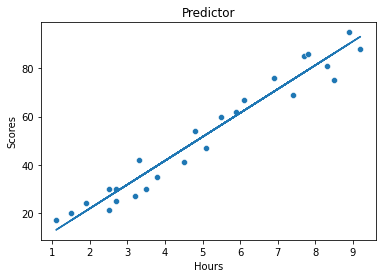

In [11]:
# plotting predictor:

p = regressor.intercept_
m = regressor.coef_ 

plt.title('Predictor')  
sns.scatterplot(data = data , x = "Hours" , y = "Scores")
plt.plot(X,m*X+p)

In [13]:
y_pred = regressor.predict(X_test) # Predicting the Test Data

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# You can also test with your own data
hours = np.array([9.25])
own_pred = regressor.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [16]:
# Model Evaluation:

from sklearn import metrics  

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
